In [14]:
!mkdir -p build && rm -rf ./build/* && cd build && cmake .. && cmake --build . --config Release

-- The C compiler identification is GNU 9.4.0
-- The CXX compiler identification is GNU 9.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Found PythonInterp: /opt/conda/bin/python3.7 (found version "3.7.7") 
-- Found PythonLibs: /opt/conda/lib/libpython3.7m.so
-- Performing Test HAS_FLTO
-- Performing Test HAS_FLTO - Success
-- Found pybind11: /opt/conda/include (found version "2.7.0" )
-- Could NOT find PythonLibs (missing: PYTHON_INCLUDE_DIRS) 
-- Found OpenCV: /opt/conda (found version "4.5.3") 
Python libs: /opt/conda/lib/libpython

In [1]:
#Note: you need to restart this notebook after compiling (step above)!
from build.naphash_cpp import naphash as nhcpp, rot_inv_type
h1 = nhcpp(32,rot_inv_type.full,False,False)

In [2]:
import numpy as np
a1 = np.zeros((5,5),np.float32)
a2 = np.ones(21,np.uint8)
h1.get_hash(a1,a2)

array(None, dtype=object)

In [3]:
#download test image (CC-SA2.0; by Brian Green; see https://commons.wikimedia.org/wiki/File:Ash_Tree_-_geograph.org.uk_-_590710.jpg)
!wget https://upload.wikimedia.org/wikipedia/commons/e/eb/Ash_Tree_-_geograph.org.uk_-_590710.jpg && mv Ash_Tree_-_geograph.org.uk_-_590710.jpg inp.jpg

--2021-09-07 10:10:02--  https://upload.wikimedia.org/wikipedia/commons/e/eb/Ash_Tree_-_geograph.org.uk_-_590710.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 91.198.174.208, 2620:0:862:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|91.198.174.208|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 111840 (109K) [image/jpeg]
Saving to: ‘Ash_Tree_-_geograph.org.uk_-_590710.jpg’

Ash_Tree_-_geograph 100%[===================>] 109.22K  --.-KB/s    in 0.06s   

2021-09-07 10:10:02 (1.85 MB/s) - ‘Ash_Tree_-_geograph.org.uk_-_590710.jpg’ saved [111840/111840]



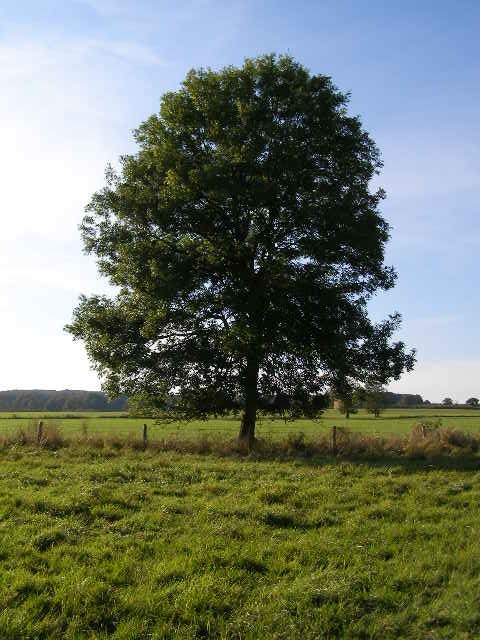

In [4]:
from PIL import Image as pi
from IPython import display as disp0
import numpy as np
def show_im(img, is_bgr=True):
    if is_bgr and len(img.shape) > 2 and img.shape[2] == 3:
        img = img[...,::-1] #PIL needs RGB instead of opencv's BGR
    if img.dtype != np.uint8:
        img = (img * (255.499/np.max(img))).astype(np.uint8)  #automatically change HDR range to LDR
    show_impil(pi.fromarray(img))
def show_impil(img):
    disp0.display(img)
i0 = np.array(pi.open('inp.jpg'))
show_im(i0, is_bgr=False)

(480, 640, 3)


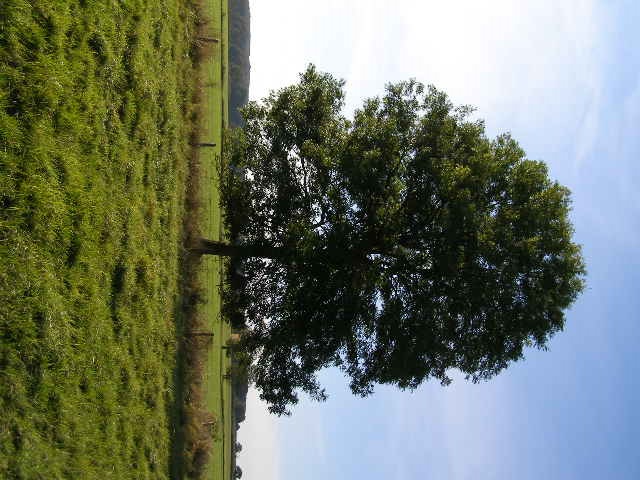

In [5]:
import cv2
i1 = cv2.rotate(i0, cv2.ROTATE_90_CLOCKWISE);
print(i1.shape)
show_im(i1, is_bgr=False)

In [6]:
h1.get_hash(i0,a2)
print("rot0:",a2)
h1.get_hash(i1,a2)
print("rot90:",a2)

rot0: [237 149 148  69  16  19  33   3 200   4 152   4  56 155   8  76  96   4
  64 136  11]
rot90: [237 149 148  69  16  19  33   3 200   4 152   4  56 155   8  76  96   4
  64 136  11]


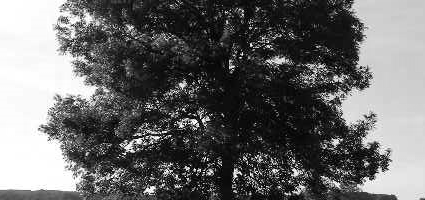

In [9]:
a3 = np.zeros((32,32),np.float32)
i3 = i0[200:400,25:450,1]
i4 = np.ascontiguousarray(i3)
#i3 = i4
show_im(i3, is_bgr=False)

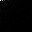

In [15]:
#h1.get_dct(i3,a3) #will return in error
#show_im(a3, is_bgr=False)
h1.get_dct(i4,a3)
show_im(a3, is_bgr=False)